In [1]:
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Investigation of the joint low birth weight and short gestation (LBWSG) risk factor exposure, relative risks, and population attributable fractions

This notebook attempts to investigate the discrepancies between the LBWSG PAFs as calculated in Vivarium, from the burdenator (get_draws), and in GBD compare results. The notebook is organized with the following sections:

- Loading LBWSG data

- Calculating LBWSG PAFs and comparing to burdenator PAFs

    - Both for a country with subnational data (India) and without subnational data
    
- Comparing burdenator PAFs with GBD compare PAFs

## Loading LBWSG data

The LBWSG exposure data cannot be accessed via standard methods (get_outputs, get_draws, or get_measures) due to an incompatibility with how the data is stored. Instead, the simulation science team software engineers have manually converted the data for specific countries to a version that is accessible to the researchers. The data is not available for all countries. 

NOTE: the LBWSG exposure data has many categories and therefore requires a lot of storage. You should request more memory in your qlogin than normal when working with LBWSG data to avoid killing your kernel. Additionally, the LBWSG data is stored in the Artifacts differently than other exposure data. It is stored so that each draw (0-999) has its own key (rather than all draws stored in a single key). This is because there is too much data to load all keys at once.

For the rest of this notebook, we will use draw_0 data only for all of our analyses and comparisons.

LBWSG exposure data for India, Mali, Pakistan, and Tanzania are stored in an accessible artifact format at the following filepath:

In [2]:
filepath = '/share/costeffectiveness/artifacts/vivarium_gates_bep/'

In [3]:
# import artifact for india
india_art = pd.HDFStore(filepath + 'india.hdf')

In [4]:
# store keys for the india artifact
india_keys = india_art.keys()

There are keys that contain indexes for other keys in the artifact. The remaining keys in the artifact do not contain indices that indicate which population group the data pertains to. The appropriate index key must be merged with data keys in order to work with it.

In [5]:
# find the name for the index keys
[k for k in india_keys if 'index' in k]

['/risk_factor/low_birth_weight_and_short_gestation/relative_risk/index',
 '/risk_factor/low_birth_weight_and_short_gestation/population_attributable_fraction/index',
 '/risk_factor/low_birth_weight_and_short_gestation/exposure/index']

NOTE: there are different indices that should be used depending on if you are working with RR, PAF, or exposure data keys

In [6]:
# Load up exposure data for draw 0 and merge with index

exposure_index = india_art.get('/risk_factor/low_birth_weight_and_short_gestation/exposure/index')
exposure_data = india_art.get('/risk_factor/low_birth_weight_and_short_gestation/exposure/draw_0')
exposure = exposure_index.merge(exposure_data, right_index=True, left_index=True)
exposure = exposure.rename(columns={'draw_0':'exposure'})
exposure.head()

,location,sex,age_start,age_end,year_start,year_end,parameter,exposure
0,India,Female,0.0,0.019178,1990,1991,cat10,0.000304
1,India,Female,0.0,0.019178,1990,1991,cat106,0.005913
2,India,Female,0.0,0.019178,1990,1991,cat11,0.000401
3,India,Female,0.0,0.019178,1990,1991,cat116,0.010518
4,India,Female,0.0,0.019178,1990,1991,cat117,0.031637


In [7]:
np.unique(exposure['age_start'])

array([0.000000e+00, 1.917808e-02, 7.671233e-02, 1.000000e+00,
       5.000000e+00, 1.000000e+01, 1.500000e+01, 2.000000e+01,
       2.500000e+01, 3.000000e+01, 3.500000e+01, 4.000000e+01,
       4.500000e+01, 5.000000e+01, 5.500000e+01, 6.000000e+01,
       6.500000e+01, 7.000000e+01, 7.500000e+01, 8.000000e+01,
       8.500000e+01, 9.000000e+01, 9.500000e+01])

In [8]:
# Load up relative risk data for draw 0 and merge with index

rr_index = india_art.get('/risk_factor/low_birth_weight_and_short_gestation/relative_risk/index')
rr_data = india_art.get('/risk_factor/low_birth_weight_and_short_gestation/relative_risk/draw_0')
rr = rr_index.merge(rr_data, right_index=True, left_index=True)
rr = rr.rename(columns={'draw_0':'rr'})
rr.head()

,location,sex,age_start,age_end,year_start,year_end,affected_entity,affected_measure,parameter,rr
0,India,Female,0.0,0.019178,1990,1991,all,excess_mortality_rate,cat10,968.702386
1,India,Female,0.0,0.019178,1990,1991,all,excess_mortality_rate,cat106,171.751901
2,India,Female,0.0,0.019178,1990,1991,all,excess_mortality_rate,cat11,513.870580
3,India,Female,0.0,0.019178,1990,1991,all,excess_mortality_rate,cat116,182.396469
4,India,Female,0.0,0.019178,1990,1991,all,excess_mortality_rate,cat117,61.431240


In [9]:
# Load up population_attributable_fraction data for draw 0 and merge with index

paf_index = india_art.get('/risk_factor/low_birth_weight_and_short_gestation/population_attributable_fraction/index')
paf_data = india_art.get('/risk_factor/low_birth_weight_and_short_gestation/population_attributable_fraction/draw_0')
paf = paf_index.merge(paf_data, right_index=True, left_index=True)
paf = paf.rename(columns={'draw_0':'paf'})
paf.head()

,location,sex,age_start,age_end,year_start,year_end,affected_entity,affected_measure,paf
0,India,Female,0.0,0.019178,1990,1991,all_causes,excess_mortality_rate,0.803415
1,India,Female,0.0,0.019178,1990,1991,communicable_maternal_neonatal_and_nutritional...,excess_mortality_rate,0.882398
2,India,Female,0.0,0.019178,1990,1991,diarrheal_diseases,excess_mortality_rate,0.910459
3,India,Female,0.0,0.019178,1990,1991,encephalitis,excess_mortality_rate,0.910447
4,India,Female,0.0,0.019178,1990,1991,enteric_infections,excess_mortality_rate,0.910459


In [10]:
# define a function to do all of the above code in a single line
# additionally, restict data to 2017, neonatal age groups, and affected entity to "all_causes"

def get_lbwsg_exposure_and_rr_data(location):
    art = pd.HDFStore(filepath + location + '.hdf')
    keys = art.keys()
    exposure_index = art.get('/risk_factor/low_birth_weight_and_short_gestation/exposure/index')
    exposure_data = art.get('/risk_factor/low_birth_weight_and_short_gestation/exposure/draw_0')
    exposure = exposure_index.merge(exposure_data, right_index=True, left_index=True)
    exposure = (exposure.rename(columns={'draw_0':'exposure'})
                .where(exposure['year_start'] == 2017)
                .where(exposure['age_start'] < 1.92e-02).dropna())
    relative_risk_index = art.get('/risk_factor/low_birth_weight_and_short_gestation/relative_risk/index')
    relative_risk_data = art.get('/risk_factor/low_birth_weight_and_short_gestation/relative_risk/draw_0')
    relative_risk = relative_risk_index.merge(relative_risk_data, right_index=True, left_index=True)
    relative_risk = (relative_risk.rename(columns={'draw_0':'relative_risk'})
                .where(relative_risk['year_start'] == 2017)
                .where(relative_risk['age_start'] < 1.92e-02).dropna())
    data = exposure.merge(relative_risk, right_on=['location','sex','age_start','age_end',
                                                   'year_start','year_end','parameter'],
                         left_on=['location','sex','age_start','age_end','year_start','year_end','parameter'])
    return data

def get_lbwsg_burdenator_all_cause_paf_data(location):
    art = pd.HDFStore(filepath + location + '.hdf')
    keys = art.keys()
    population_attributable_fraction_index = art.get('/risk_factor/low_birth_weight_and_short_gestation/population_attributable_fraction/index')
    population_attributable_fraction_data = art.get('/risk_factor/low_birth_weight_and_short_gestation/population_attributable_fraction/draw_0')
    population_attributable_fraction = population_attributable_fraction_index.merge(population_attributable_fraction_data, right_index=True, left_index=True)
    population_attributable_fraction = (population_attributable_fraction.rename(columns={'draw_0':'population_attributable_fraction'})
                .where(population_attributable_fraction['year_start'] == 2017)
                .where(population_attributable_fraction['age_start'] < 1.92e-02)
                .where(population_attributable_fraction['affected_entity'] == 'all_causes').dropna())
    return population_attributable_fraction

This section calculates PAFs from exposure and relative risk data using the formula in the "categpaf" function defined here: https://github.com/ihmeuw/ihme-modeling/blob/26a91478ddbe59d8663c50a9be3711a28bf83bbc/gbd_2017/shared_code/central_comp/risk/paf/math.R#L135

In [11]:
test = get_lbwsg_exposure_and_rr_data('india')
test['exp_rr'] = test['exposure'] * test['relative_risk']
test = test.groupby(['location','sex','age_start','age_end','year_start','year_end'], as_index=False).sum()
test['paf'] = (test['exp_rr'] - 1)/test['exp_rr']
test.head()

,location,sex,age_start,age_end,year_start,year_end,exposure,relative_risk,exp_rr,paf
0,India,Female,0.000000,0.019178,2017.0,2018.0,1.0,7799.253892,15.331917,0.934777
1,India,Female,0.019178,0.076712,2017.0,2018.0,1.0,3616.257060,7.700179,0.870133
2,India,Male,0.000000,0.019178,2017.0,2018.0,1.0,6909.244473,17.564221,0.943066
3,India,Male,0.019178,0.076712,2017.0,2018.0,1.0,2770.238908,7.182779,0.860778


Notably, the PAFs calculated above do not match the PAFs pulled from the burdenator data

In [12]:
india_test_pafs = get_lbwsg_burdenator_all_cause_paf_data('india')
india_test_pafs.head()

,location,sex,age_start,age_end,year_start,year_end,affected_entity,affected_measure,population_attributable_fraction
675,India,Female,0.000000,0.019178,2017.0,2018.0,all_causes,excess_mortality_rate,0.874425
1375,India,Female,0.019178,0.076712,2017.0,2018.0,all_causes,excess_mortality_rate,0.782477
16775,India,Male,0.000000,0.019178,2017.0,2018.0,all_causes,excess_mortality_rate,0.875601
17475,India,Male,0.019178,0.076712,2017.0,2018.0,all_causes,excess_mortality_rate,0.746058


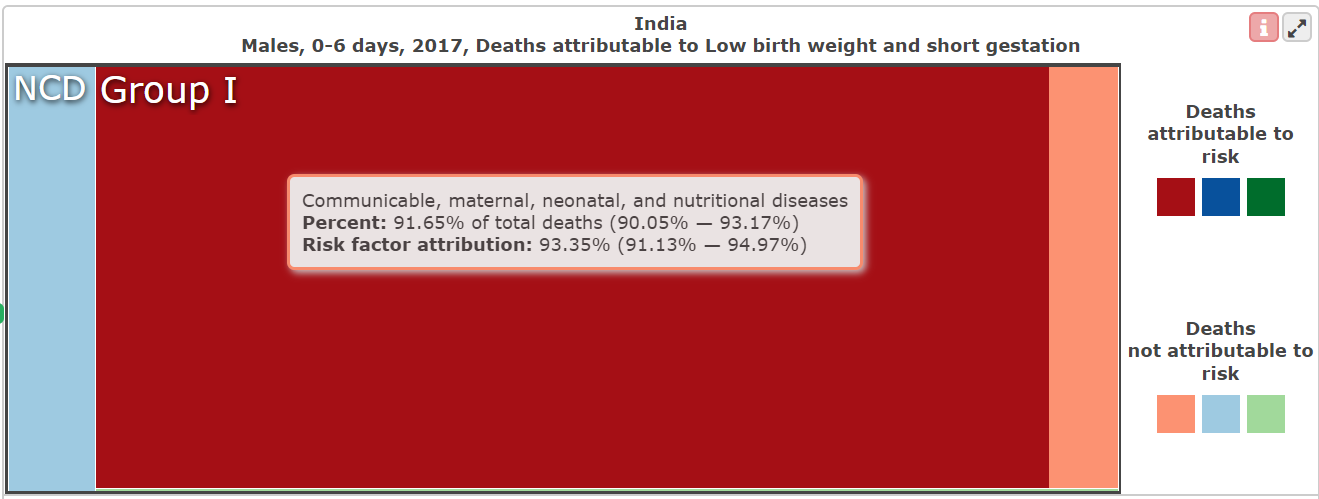

The PAF for early neonatal males in India from GBD compare can be calculated as 0.9165 * 0.9335 = 0.855, which is closer to the burdenator PAFs than the exposure/RR calculated PAFs. NOTE: the GBD compare PAF does not exacly match the burdenator PAF, which is expected, because the GBD compare PAF is an average over all draws and the burdenator PAF is for draw 0 only.

The results are similar when repeated for the remaining locations (change the location name in the first line of each code block to view location-specific results)

In [15]:
test = get_lbwsg_exposure_and_rr_data('tanzania')
test['exp_rr'] = test['exposure'] * test['relative_risk']
test = test.groupby(['location','sex','age_start','age_end','year_start','year_end'], as_index=False).sum()
test['paf'] = (test['exp_rr'] - 1)/test['exp_rr']
test.head()

,location,sex,age_start,age_end,year_start,year_end,exposure,relative_risk,exp_rr,paf
0,Tanzania,Female,0.000000,0.019178,2017.0,2018.0,1.0,7799.253892,12.428165,0.919538
1,Tanzania,Female,0.019178,0.076712,2017.0,2018.0,1.0,3616.257060,5.240135,0.809165
2,Tanzania,Male,0.000000,0.019178,2017.0,2018.0,1.0,6909.244473,10.335028,0.903242
3,Tanzania,Male,0.019178,0.076712,2017.0,2018.0,1.0,2770.238908,4.388692,0.772142


In [16]:
test = get_lbwsg_burdenator_all_cause_paf_data('tanzania')
test.head()

,location,sex,age_start,age_end,year_start,year_end,affected_entity,affected_measure,population_attributable_fraction
675,Tanzania,Female,0.000000,0.019178,2017.0,2018.0,all_causes,excess_mortality_rate,0.788563
1375,Tanzania,Female,0.019178,0.076712,2017.0,2018.0,all_causes,excess_mortality_rate,0.665094
16775,Tanzania,Male,0.000000,0.019178,2017.0,2018.0,all_causes,excess_mortality_rate,0.735133
17475,Tanzania,Male,0.019178,0.076712,2017.0,2018.0,all_causes,excess_mortality_rate,0.562703
